In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/deister/AI/master/resources/diabetes.csv')
cols = [0,1]
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,pregnancies,plasma_glucose,diastolic_bp,skinfold,insulin,weight_class,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,obese,0.627,50,Y
1,1,85.0,66.0,29.0,NaN,overweight,0.351,31,N
2,8,183.0,64.0,NaN,NaN,normal,0.672,32,Y
3,1,89.0,66.0,23.0,94.0,overweight,0.167,21,N
4,0,137.0,40.0,35.0,168.0,morbidly obese,2.288,33,Y
5,5,116.0,74.0,NaN,NaN,overweight,0.201,30,N
6,3,78.0,50.0,32.0,88.0,obese,0.248,26,Y
7,10,115.0,NaN,NaN,NaN,obese,0.134,29,N
8,2,197.0,70.0,45.0,543.0,obese,0.158,53,Y
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,Y


In [3]:
df.describe()

,pregnancies,plasma_glucose,diastolic_bp,skinfold,insulin,pedigree,age
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000


In [222]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

plasma_glucose      5
diastolic_bp       35
skinfold          227
insulin           374
weight_class       11
dtype: int64

In [223]:
from sklearn import preprocessing

# Impute missing values with column mean
df = df.fillna(df.mean())

# Get one hot encoding of column weight_class
one_hot = pd.get_dummies(df['weight_class'])

# Drop weight_class column as it is now encoded
df = df.drop('weight_class',axis = 1)

# Join the encoded df
df = df.join(one_hot)


'''
Alr¡ternative to one hot encode categorical varibales:

categorical_variables = ["Sex", "Cabin", "Embarked"]

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace = True)
    dummies = pd.get_dummies(X[variable], prefix = variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis = 1)
    X.drop([variable], axis = 1, inplace = True)

'''

from sklearn.preprocessing import StandardScaler

# Standardize our dataset (ignoring weight class columns)
columns = ['pregnancies', 'plasma_glucose', 'diastolic_bp', 'skinfold', 'insulin', 'pedigree', 'age']
df[columns] = StandardScaler().fit_transform(df[columns])

# Map diabetes in order to convert form 'Y', 'N' to 1 and 0
df['diabetes'] = df['diabetes'].map({'Y': 1, 'N': 0})

In [224]:
df.head(5)

,pregnancies,plasma_glucose,diastolic_bp,skinfold,insulin,pedigree,age,diabetes,morbidly obese,normal,obese,overweight,underweight
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.468492,1.425995,1,0,0,1,0,0
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.365061,-0.190672,0,0,0,0,1,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,0.604397,-0.105584,1,0,1,0,0,0
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.920763,-1.041549,0,0,0,0,1,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,5.484909,-0.020496,1,1,0,0,0,0


In [225]:
X_train = df
X_test = df.pop('diabetes')

In [226]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

model = RandomForestRegressor(100, oob_score = True, n_jobs = -1, random_state = 42)
model.fit(X_train, X_test)

print("C-stat: ", roc_auc_score(X_test, model.oob_prediction_))

C-stat:  0.8128432835820896


In [227]:
model.feature_importances_

array([0.07615381, 0.33446941, 0.09581626, 0.06905085, 0.07418806,
       0.13990696, 0.13103306, 0.00997691, 0.0267298 , 0.01860596,
       0.02406891, 0.        ])

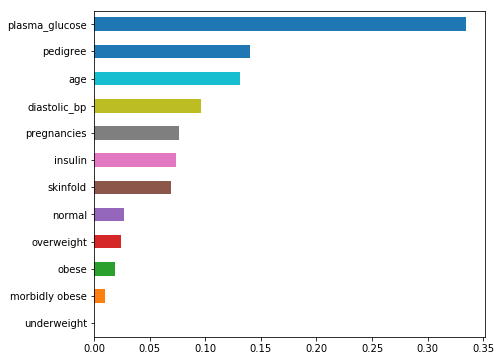

In [228]:
feature_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feature_importances.sort_values(ascending=True, inplace = True)
feature_importances.plot(kind = "barh", figsize = (7, 6))